# NB 3b | Dashboard 
---
## Project:
Amazon Reviews Analysis (DSC 400)

## Dataset:
Original: SAHITYA SAHU Amazon Large Dataset (~123GB) Sampled & Cleaned: Amazon_Master_Cleaned.csv (129794, 27)

## NB Objective: 
Create an interactive dashboard, ready for presentation and expliantion of insights

**Tasks:**
1. Create a dashboard
2. Select specific visuals
3. Refine to make presentable 

## Setup & Load 
---

In [1]:
#For plots
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Dashboard
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.express as px

#Save to folder
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html
import dash_bootstrap_components as dbcl
import dash_bootstrap_components as dbc

In [2]:
#Load
df_master = pd.read_csv('Amazon_FE_Dataset.csv')

## Create Final Presentable Plots
---

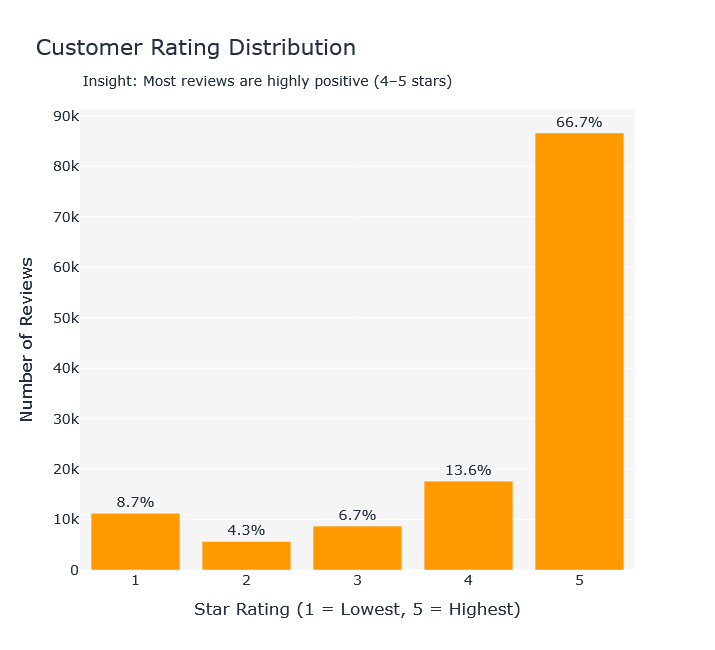

In [3]:
#Plot 1

amazon_orange = "#FF9900"
amazon_navy = "#232F3E"
amazon_gray = "#F5F5F5"

rating_counts = df_master["overall"].value_counts().sort_index()
rating_percent = rating_counts / rating_counts.sum() * 100

fig1 = px.bar(
    x=rating_counts.index,
    y=rating_counts.values,
    text=[f"{p:.1f}%" for p in rating_percent],
    labels={
        "x": "Star Rating (1 = Lowest, 5 = Highest)",
        "y": "Number of Reviews"
    },
    title="Customer Rating Distribution",
)

fig1.update_traces(
    marker_color=amazon_orange,
    textposition="outside",
    hovertemplate="<b>%{x} Stars</b><br>%{y:,} reviews<extra></extra>"
)

fig1.update_layout(
    height=650,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    title_font_color=amazon_navy,
    margin=dict(t=110),
)

fig1.add_annotation(
    text="Insight: Most reviews are highly positive (4–5 stars)",
    xref="paper", yref="paper",
    x=0, y=1.09,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig1.show()

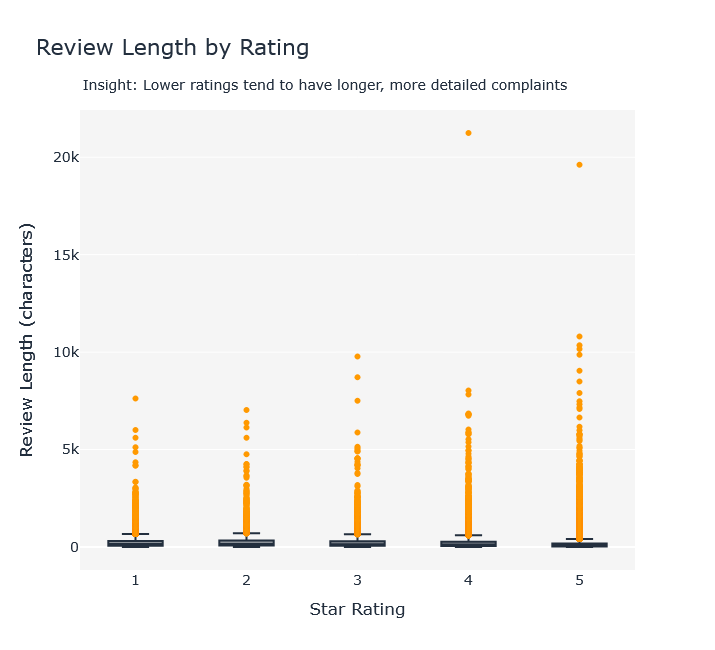

In [4]:
#Plot 2

fig2 = px.box(
    df_master,
    x="overall",
    y="review_length",
    points="outliers",
    labels={
        "overall": "Star Rating",
        "review_length": "Review Length (characters)"
    },
    title="Review Length by Rating"
)

fig2.update_traces(
    marker_color=amazon_orange,
    line_color=amazon_navy
)

fig2.update_layout(
    height=650,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    title_font_color=amazon_navy,
    margin=dict(t=110)
)

fig2.add_annotation(
    text="Insight: Lower ratings tend to have longer, more detailed complaints",
    xref="paper", yref="paper",
    x=0, y=1.08,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig2.show()

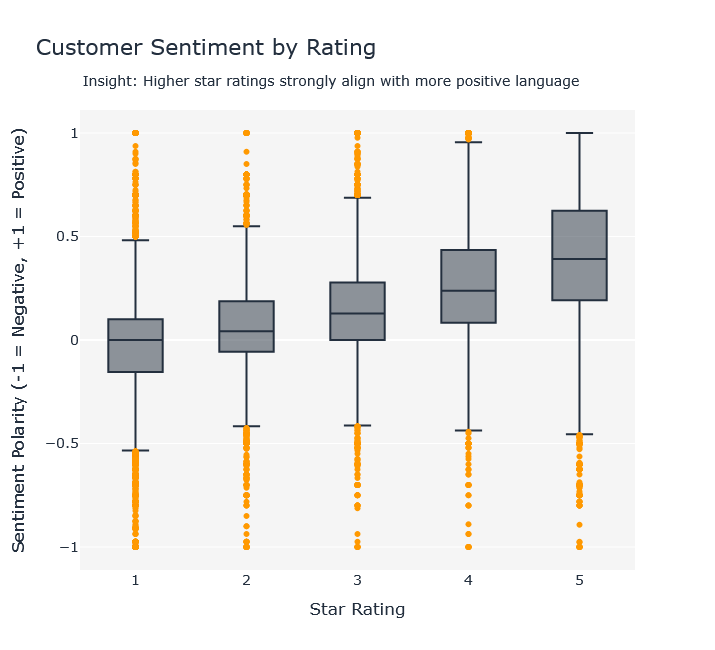

In [5]:
#Plot 3
fig3 = px.box(
    df_master,
    x="overall",
    y="sentiment_polarity",
    points="outliers",
    labels={
        "overall": "Star Rating",
        "sentiment_polarity": "Sentiment Polarity (-1 = Negative, +1 = Positive)"
    },
    title="Customer Sentiment by Rating"
)

fig3.update_traces(
    marker_color=amazon_orange,
    line_color=amazon_navy
)

fig3.update_layout(
    height=650,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

fig3.add_annotation(
    text="Insight: Higher star ratings strongly align with more positive language",
    xref="paper", yref="paper",
    x=0, y=1.09,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig3.show()

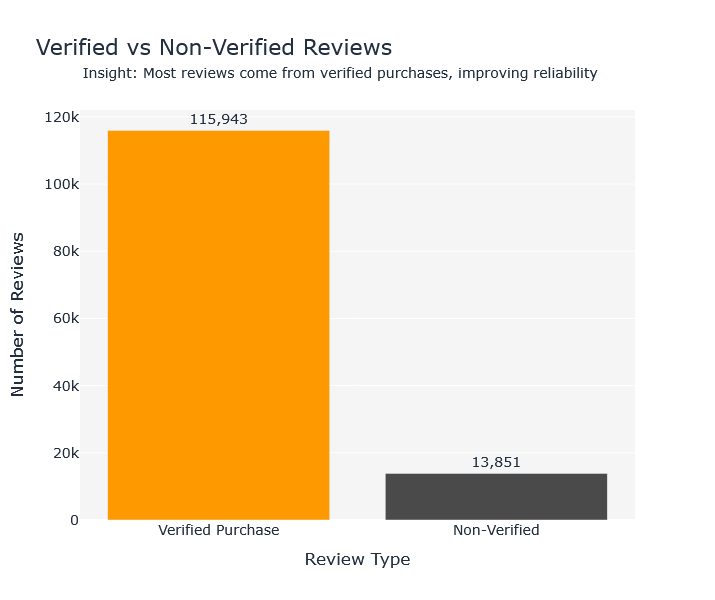

In [6]:
#Plot 4
verified_counts = df_master["verified"].value_counts()

fig4 = px.bar(
    x=["Verified Purchase", "Non-Verified"],
    y=verified_counts.values,
    text=[f"{v:,}" for v in verified_counts.values],
    labels={"x": "Review Type", "y": "Number of Reviews"},
    title="Verified vs Non-Verified Reviews"
)

fig4.update_traces(
    marker_color=[amazon_orange, "#4A4A4A"],
    textposition="outside",
    hovertemplate="<b>%{x}</b><br>%{y:,} reviews<extra></extra>"
)

fig4.update_layout(
    height=600,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

fig4.add_annotation(
    text="Insight: Most reviews come from verified purchases, improving reliability",
    xref="paper", yref="paper",
    x=0, y=1.12,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig4.show()


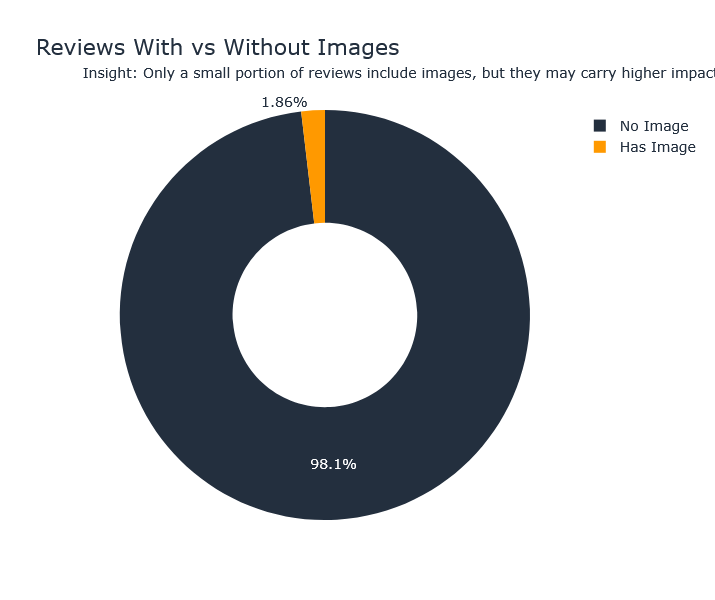

In [7]:
#Plot 5
image_counts = df_master["has_image"].value_counts()

fig5 = px.pie(
    names=["No Image", "Has Image"],
    values=image_counts.values,
    title="Reviews With vs Without Images",
    hole=0.45
)

fig5.update_traces(
    marker=dict(colors=[amazon_navy, amazon_orange]),
    hovertemplate="<b>%{label}</b><br>%{value:,} reviews (%{percent})<extra></extra>"
)

fig5.update_layout(
    height=600,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

fig5.add_annotation(
    text="Insight: Only a small portion of reviews include images, but they may carry higher impact",
    xref="paper", yref="paper",
    x=0, y=1.12,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig5.show()

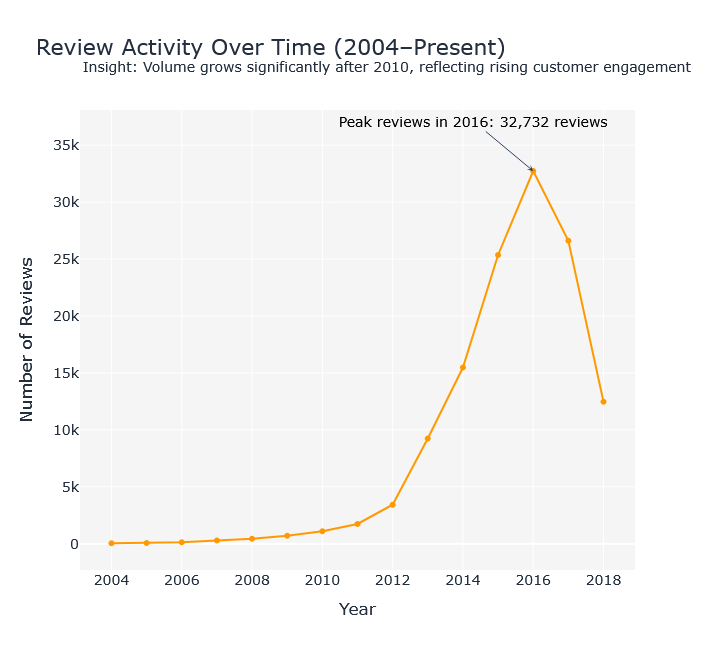

In [8]:
#Plot 6
reviews_year = df_master[df_master["review_year"] >= 2004] \
    .groupby("review_year") \
    .size() \
    .reset_index(name="num_reviews")

fig6 = px.line(
    reviews_year,
    x="review_year",
    y="num_reviews",
    markers=True,
    labels={
        "review_year": "Year",
        "num_reviews": "Number of Reviews"
    },
    title="Review Activity Over Time (2004–Present)"
)

fig6.update_traces(
    line=dict(color=amazon_orange),
    hovertemplate="Year: %{x}<br>Reviews: %{y:,}<extra></extra>"
)

fig6.update_layout(
    height=650,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

peak_year = reviews_year.loc[reviews_year["num_reviews"].idxmax()]
fig6.add_annotation(
    text=f"Peak reviews in {int(peak_year['review_year'])}: {int(peak_year['num_reviews']):,} reviews",
    x=peak_year["review_year"], y=peak_year["num_reviews"],
    showarrow=True,
    arrowhead=3,
    ax=-60,
    ay=-50,
    font=dict(size=14, color="black")
)

fig6.add_annotation(
    text="Insight: Volume grows significantly after 2010, reflecting rising customer engagement",
    xref="paper", yref="paper",
    x=0, y=1.12,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig6.show()

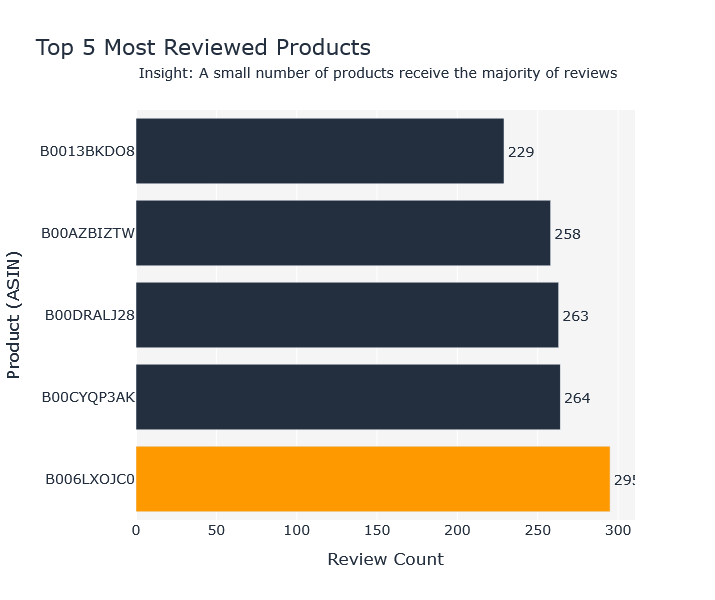

In [9]:
#Plot 7
top_products = df_master["asin"].value_counts().head(5).reset_index()
top_products.columns = ["Product (ASIN)", "Review Count"]

#Assign colors
colors = [amazon_orange] + [amazon_navy]*(len(top_products)-1)

fig7 = px.bar(
    top_products,
    x="Review Count",
    y="Product (ASIN)",
    orientation="h",
    title="Top 5 Most Reviewed Products",
    text="Review Count",
    color=top_products["Review Count"],
)

fig7.update_traces(marker_color=colors, textposition="outside",
                   hovertemplate="<b>%{y}</b><br>%{x:,} reviews<extra></extra>")

fig7.update_layout(
    height=600,
    width=930, 
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

fig7.add_annotation(
    text="Insight: A small number of products receive the majority of reviews",
    xref="paper", yref="paper",
    x=0, y=1.12,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig7.show()

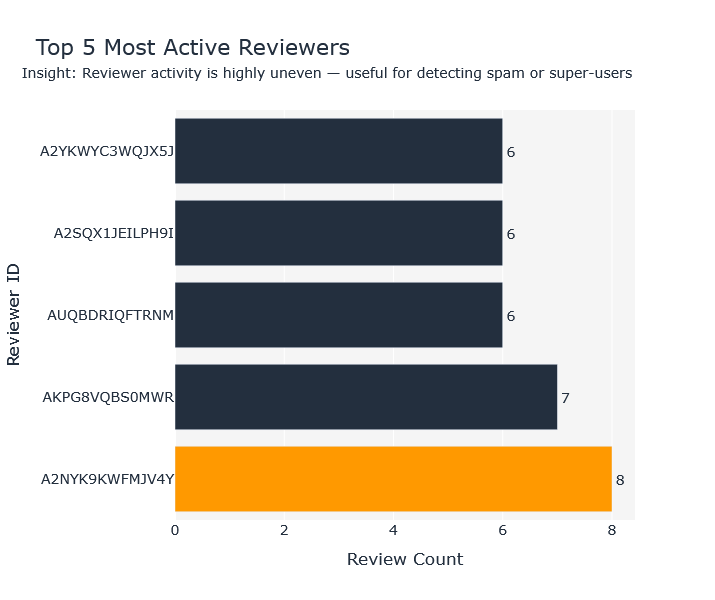

In [10]:
#Plot 8
top_reviewers = df_master["reviewerID"].value_counts().head(5).reset_index()
top_reviewers.columns = ["Reviewer ID", "Review Count"]

colors = [amazon_orange] + [amazon_navy]*(len(top_reviewers)-1)

fig8 = px.bar(
    top_reviewers,
    x="Review Count",
    y="Reviewer ID",
    orientation="h",
    title="Top 5 Most Active Reviewers",
    text="Review Count"
)

fig8.update_traces(marker_color=colors, textposition="outside",
                   hovertemplate="<b>%{y}</b><br>%{x:,} reviews<extra></extra>")

fig8.update_layout(
    height=600,
    plot_bgcolor=amazon_gray,
    paper_bgcolor="white",
    font=dict(size=14, color=amazon_navy),
    title_font_size=22,
    margin=dict(t=110)
)

fig8.add_annotation(
    text="Insight: Reviewer activity is highly uneven — useful for detecting spam or super-users",
    xref="paper", yref="paper",
    x=1, y=1.12,
    showarrow=False,
    font=dict(size=14, color=amazon_navy)
)

fig8.show()

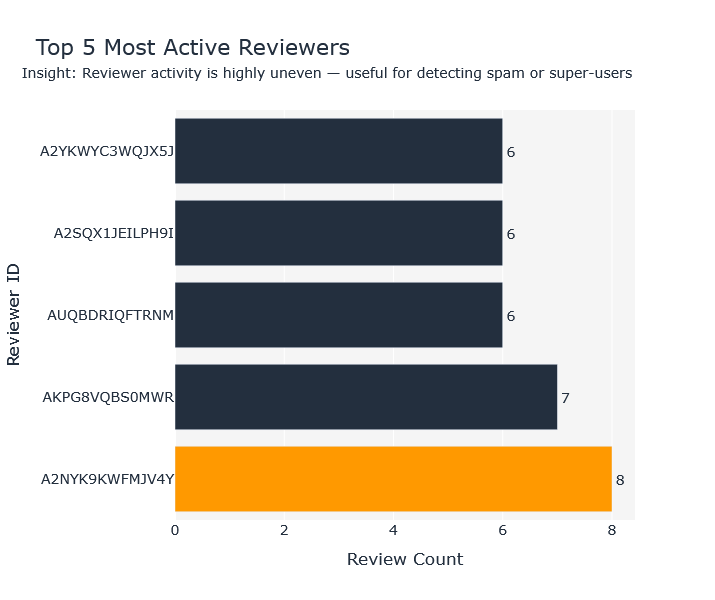

In [11]:
#Plots for Dahsboard
# -----------------------

#Amazon-inspired colors
amazon_orange = "#FF9900"
amazon_navy = "#232F3E"
amazon_gray = "#F5F5F5"

# Define Amazon-inspired colors
amazon_orange = "#FF9900"
amazon_navy = "#232F3E"
amazon_gray = "#F5F5F5"

# Plot 1: Customer Rating Distribution
# -----------------------
rating_counts = df_master["overall"].value_counts().sort_index()
rating_percent = rating_counts / rating_counts.sum() * 100

fig1 = px.bar(
    x=rating_counts.index,
    y=rating_counts.values,
    text=[f"{p:.1f}%" for p in rating_percent],
    labels={"x": "Star Rating (1 = Lowest, 5 = Highest)",
            "y": "Number of Reviews"},
    title="Customer Rating Distribution",
)
fig1.update_traces(marker_color=amazon_orange, textposition="outside",
                   hovertemplate="<b>%{x} Stars</b><br>%{y:,} reviews<extra></extra>")
fig1.update_layout(height=650, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22,
                   title_font_color=amazon_navy, margin=dict(t=110))
fig1.add_annotation(text="Insight: Most reviews are highly positive (4–5 stars)",
                    xref="paper", yref="paper", x=0, y=1.09, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 2: Review Length by Rating
# -----------------------
fig2 = px.box(df_master, x="overall", y="review_length", points="outliers",
              labels={"overall": "Star Rating",
                      "review_length": "Review Length (characters)"},
              title="Review Length by Rating")
fig2.update_traces(marker_color=amazon_orange, line_color=amazon_navy)
fig2.update_layout(height=650, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22,
                   title_font_color=amazon_navy, margin=dict(t=110))
fig2.add_annotation(text="Insight: Lower ratings tend to have longer, more detailed complaints",
                    xref="paper", yref="paper", x=0, y=1.08, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 3: Sentiment Polarity by Rating
# -----------------------
fig3 = px.box(df_master, x="overall", y="sentiment_polarity", points="outliers",
              labels={"overall": "Star Rating",
                      "sentiment_polarity": "Sentiment Polarity (-1 = Negative, +1 = Positive)"},
              title="Customer Sentiment by Rating")
fig3.update_traces(marker_color=amazon_orange, line_color=amazon_navy)
fig3.update_layout(height=650, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22,
                   margin=dict(t=110))
fig3.add_annotation(text="Insight: Higher star ratings strongly align with more positive language",
                    xref="paper", yref="paper", x=0, y=1.09, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 4: Verified vs Non-Verified Reviews
# -----------------------
verified_counts = df_master["verified"].value_counts()
fig4 = px.bar(x=["Verified Purchase", "Non-Verified"], y=verified_counts.values,
              text=[f"{v:,}" for v in verified_counts.values],
              labels={"x": "Review Type", "y": "Number of Reviews"},
              title="Verified vs Non-Verified Reviews")
fig4.update_traces(marker_color=[amazon_orange, "#4A4A4A"], textposition="outside",
                   hovertemplate="<b>%{x}</b><br>%{y:,} reviews<extra></extra>")
fig4.update_layout(height=600, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22, margin=dict(t=110))
fig4.add_annotation(text="Insight: Most reviews come from verified purchases, improving reliability",
                    xref="paper", yref="paper", x=0, y=1.12, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 5: Reviews With vs Without Images
# -----------------------
image_counts = df_master["has_image"].value_counts()
fig5 = px.pie(names=["No Image", "Has Image"], values=image_counts.values,
              title="Reviews With vs Without Images", hole=0.45)
fig5.update_traces(marker=dict(colors=[amazon_navy, amazon_orange]),
                   hovertemplate="<b>%{label}</b><br>%{value:,} reviews (%{percent})<extra></extra>")
fig5.update_layout(height=600, paper_bgcolor="white", font=dict(size=14, color=amazon_navy),
                   title_font_size=22, margin=dict(t=110))
fig5.add_annotation(text="Insight: Only a small portion of reviews include images, but they may carry higher impact",
                    xref="paper", yref="paper", x=0, y=1.12, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 6: Review Activity Over Time
# -----------------------
reviews_year = df_master[df_master["review_year"] >= 2004].groupby("review_year").size().reset_index(name="num_reviews")
fig6 = px.line(reviews_year, x="review_year", y="num_reviews", markers=True,
               labels={"review_year": "Year", "num_reviews": "Number of Reviews"},
               title="Review Activity Over Time (2004–Present)")
fig6.update_traces(line=dict(color=amazon_orange),
                   hovertemplate="Year: %{x}<br>Reviews: %{y:,}<extra></extra>")
fig6.update_layout(height=650, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22, margin=dict(t=110))
peak_year = reviews_year.loc[reviews_year["num_reviews"].idxmax()]
fig6.add_annotation(text=f"Peak reviews in {int(peak_year['review_year'])}: {int(peak_year['num_reviews']):,} reviews",
                    x=peak_year["review_year"], y=peak_year["num_reviews"],
                    showarrow=True, arrowhead=3, ax=-60, ay=-50, font=dict(size=14, color="black"))
fig6.add_annotation(text="Insight: Volume grows significantly after 2010, reflecting rising customer engagement",
                    xref="paper", yref="paper", x=0, y=1.12, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 7: Top 5 Most Reviewed Products
# -----------------------
top_products = df_master["asin"].value_counts().head(5).reset_index()
top_products.columns = ["Product (ASIN)", "Review Count"]
colors = [amazon_orange] + [amazon_navy]*(len(top_products)-1)
fig7 = px.bar(top_products, x="Review Count", y="Product (ASIN)", orientation="h",
              title="Top 5 Most Reviewed Products", text="Review Count")
fig7.update_traces(marker_color=colors, textposition="outside",
                   hovertemplate="<b>%{y}</b><br>%{x:,} reviews<extra></extra>")
fig7.update_layout(height=600, width=930, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22, margin=dict(t=110))
fig7.add_annotation(text="Insight: A small number of products receive the majority of reviews",
                    xref="paper", yref="paper", x=0, y=1.12, showarrow=False,
                    font=dict(size=14, color=amazon_navy))

# Plot 8: Top 5 Most Active Reviewers
# -----------------------
top_reviewers = df_master["reviewerID"].value_counts().head(5).reset_index()
top_reviewers.columns = ["Reviewer ID", "Review Count"]
colors = [amazon_orange] + [amazon_navy]*(len(top_reviewers)-1)
fig8 = px.bar(top_reviewers, x="Review Count", y="Reviewer ID", orientation="h",
              title="Top 5 Most Active Reviewers", text="Review Count")
fig8.update_traces(marker_color=colors, textposition="outside",
                   hovertemplate="<b>%{y}</b><br>%{x:,} reviews<extra></extra>")
fig8.update_layout(height=600, plot_bgcolor=amazon_gray, paper_bgcolor="white",
                   font=dict(size=14, color=amazon_navy), title_font_size=22, margin=dict(t=110))
fig8.add_annotation(text="Insight: Reviewer activity is highly uneven — useful for detecting spam or super-users",
                    xref="paper", yref="paper", x=1, y=1.12, showarrow=False,
                    font=dict(size=14, color=amazon_navy))



## KPIs
---

In [19]:
#Load the dataset
import pandas as pd

df = pd.read_csv("Amazon_FE_Dataset.csv")

#Average Rating
avg_rating = df['overall'].mean().round(2)

#Most Reviewed Product
most_reviewed_product = df['asin'].value_counts().idxmax()
most_reviews_count = df['asin'].value_counts().max()

#Average Sentiment Polarity
avg_sentiment = df['sentiment_polarity'].mean().round(2)

#Top Reviewer
top_reviewer = df['reviewerID'].value_counts().idxmax()
top_reviewer_count = df['reviewerID'].value_counts().max()

#Results
print(f"Average Rating: {avg_rating}")
print(f"Most Reviewed Product: {most_reviewed_product} ({most_reviews_count} reviews)")
print(f"Average Sentiment Polarity: {avg_sentiment}")
print(f"Top Reviewer: {top_reviewer} ({top_reviewer_count} reviews)")

Average Rating: 4.25
Most Reviewed Product: B006LXOJC0 (295 reviews)
Average Sentiment Polarity: 0.32
Top Reviewer: A2NYK9KWFMJV4Y (8 reviews)


## Dashboard
---

In [28]:
#Dashboard
# -----------------------

#Initialize app
# -----------------------
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

#Dashboard layout
# -----------------------
app.layout = dbc.Container([
    
#Header
    dbc.Row([
        dbc.Col(html.H1("Amazon Reviews Analysis Dashboard", 
                        style={'textAlign':'center', 'color': amazon_orange, 
                               'marginTop':20, 'marginBottom':20})),
        html.H5(
            [
                "Original Dataset: ", 
                html.A("Amazon Dataset 2026 (~123GB)", href="https://www.kaggle.com/datasets/sahityasahu/amazon-review-dataset",
                       target="_blank", style={'color': amazon_navy,})
            ],
            style={'textAlign':'center', 'marginBottom':30}
        ),
                
        html.P(
            "This dashboard is designed to provide an overview of customer reviews on Amazon products, "
            "highlighting key insights such as rating distribution, sentiment trends, review activity over time, "
            "and the most active products and reviewers. It guides analysts and non-technical audiences to "
            "better understand customer behavior and product performance. Note: This dashboard works best "
            "on a desktop or laptop.",
            style={'textAlign':'center', 'fontSize':16, 'color': amazon_navy, 'marginBottom':30}
        )
    ]),
    
# KPI Section Placeholder
    dbc.Row([
    dbc.Col(dbc.Card(dbc.CardBody(html.H5(f"Avg Rating: {avg_rating}"))), md=3),
    dbc.Col(dbc.Card(dbc.CardBody(html.H5(f"Most Reviewed Product: {most_reviewed_product} ({most_reviews_count} reviews)"))), md=3),
    dbc.Col(dbc.Card(dbc.CardBody(html.H5(f"Sentiment Score: {avg_sentiment}"))), md=3),
    dbc.Col(dbc.Card(dbc.CardBody(html.H5(f"Top Reviewer: {top_reviewer} ({top_reviewer_count} reviews)"))), md=3),
], style={'marginBottom':40}),
    
    # Customer Ratings & Sentiment
    dbc.Row([
        dbc.Col(dcc.Graph(id='plot1', figure=fig1), md=6),
        dbc.Col(dcc.Graph(id='plot2', figure=fig2), md=6)
    ], style={'marginBottom':40}),
    
    # Review Activity
    dbc.Row([
    dbc.Col(dcc.Graph(id='plot4', figure=fig4), md=6),
    dbc.Col(dcc.Graph(id='plot5', figure=fig5), md=6)
]),
    dbc.Row([
    dbc.Col(dcc.Graph(id='plot6', figure=fig6), md=6),
    dbc.Col(dcc.Graph(id='plot8', figure=fig8), md=6),
]), 
    
    # Top Products & Reviewers
    dbc.Row([
        dbc.Col(dcc.Graph(id='plot7', figure=fig7), md=6)
    ], style={'marginBottom':40}),
    

    
#Footer / Insights placeholder (for now)
# -----------------------
    dbc.Row([
    # Title
    dbc.Col(html.H4("Key Insights & Recommendations", style={'color': amazon_orange, 'marginBottom':20}), width=12),
    
    # KPI Cards
    dbc.Col(dbc.Card(
        dbc.CardBody([
            html.H5("Average Rating", className="card-title"),
            html.P(f"{avg_rating} / 5", className="card-text"),
            html.Small("Slightly positive overall sentiment", className="text-muted")
        ])
    ), md=3, style={'marginBottom':15}),

    dbc.Col(dbc.Card(
        dbc.CardBody([
            html.H5("Most Reviewed Product", className="card-title"),
            html.P(f"{most_reviewed_product}", className="card-text"),
            html.Small(f"{most_reviews_count} reviews total", className="text-muted")
        ])
    ), md=3, style={'marginBottom':15}),

    dbc.Col(dbc.Card(
        dbc.CardBody([
            html.H5("Average Sentiment", className="card-title"),
            html.P(f"{avg_sentiment}", className="card-text"),
            html.Small("Slightly positive overall", className="text-muted")
        ])
    ), md=3, style={'marginBottom':15}),

    dbc.Col(dbc.Card(
        dbc.CardBody([
            html.H5("Top Reviewer", className="card-title"),
            html.P(f"{top_reviewer}", className="card-text"),
            html.Small(f"{top_reviewer_count} reviews", className="text-muted")
        ])
    ), md=3, style={'marginBottom':15}),
    
    # Recommendation / Insights Card (full width)
    dbc.Row([
    dbc.Col(dbc.Card(dbc.CardBody([
        html.H6("Rating Distribution"),
        html.P("Most reviews are 5-stars; low and medium ratings are rare.", style={'fontSize':14})
    ]), color="light", outline=True), md=3),
    
    dbc.Col(dbc.Card(dbc.CardBody([
        html.H6("Review Length"),
        html.P("Extreme ratings (1 & 5 stars) have longer, detailed reviews.", style={'fontSize':14})
    ]), color="light", outline=True), md=3),
    
    dbc.Col(dbc.Card(dbc.CardBody([
        html.H6("Sentiment"),
        html.P("Positive reviews match higher ratings; negative reviews match lower ratings.", style={'fontSize':14})
    ]), color="light", outline=True), md=3),
    
    dbc.Col(dbc.Card(dbc.CardBody([
        html.H6("Product Concentration"),
        html.P("A few products get most reviews; many products have very few.", style={'fontSize':14})
    ]), color="light", outline=True), md=3),
], style={'marginTop':30, 'marginBottom':30})
])
    
], fluid=True, style={'backgroundColor':'#F2F2F2', 'padding':20})

#Run
# -----------------------
if __name__ == "__main__":
    app.run(host="127.0.0.1", port=8050, debug=True)